This notebook contains the live demo shown in the meetup talk. Each cell adds an element to the chart. The new content per cell is highlighted by comments.

In [1]:
import altair as alt
from vega_datasets import data

In [19]:
# load data
df = data.gapminder()

# assign region labels
df['region'] = df['cluster'].map({
    0: 'Indian Subcontinent',
    1: 'Europe',
    2: 'Africa',
    3: 'Americas',
    4: 'Asia/Pacific',
    5: 'Middle East',
})

df['pop'] = (df['pop'] / 1.e6).round()

# select 4 largest countries per group, by latest population
print(len(df))
last_year = df['year'].max()
largest_per_group = df[df['year'] == last_year].groupby('region').apply(lambda g: g.sort_values(by='pop').iloc[-5:])['country']
print(largest_per_group)
df = df[df['country'].isin(largest_per_group)].sort_values(by=['country', 'year'])
print(len(df))

693
region                  
Africa               604            Rwanda
                     450             Kenya
                     626      South Africa
                     527           Nigeria
Americas             21          Argentina
                     164          Colombia
                     494            Mexico
                     120            Brazil
                     681     United States
Asia/Pacific         472       North Korea
                     571       Philippines
                     439             Japan
                     362         Indonesia
                     153             China
Europe               417             Italy
                     670    United Kingdom
                     263            France
                     659            Turkey
                     285           Germany
Indian Subcontinent  10        Afghanistan
                     76         Bangladesh
                     549          Pakistan
                     351 

In [20]:
df.head()

,year,country,cluster,pop,life_expect,fertility,region
0,1955,Afghanistan,0,9.0,30.332,7.7,Indian Subcontinent
1,1960,Afghanistan,0,10.0,31.997,7.7,Indian Subcontinent
2,1965,Afghanistan,0,11.0,34.020,7.7,Indian Subcontinent
3,1970,Afghanistan,0,12.0,36.088,7.7,Indian Subcontinent
4,1975,Afghanistan,0,14.0,38.438,7.7,Indian Subcontinent


In [21]:
df.tail()

,year,country,cluster,pop,life_expect,fertility,region
677,1985,United States,3,238.0,75.020,1.924,Americas
678,1990,United States,3,250.0,76.090,2.025,Americas
679,1995,United States,3,267.0,76.810,1.994,Americas
680,2000,United States,3,282.0,77.310,2.038,Americas
681,2005,United States,3,296.0,78.242,2.054,Americas


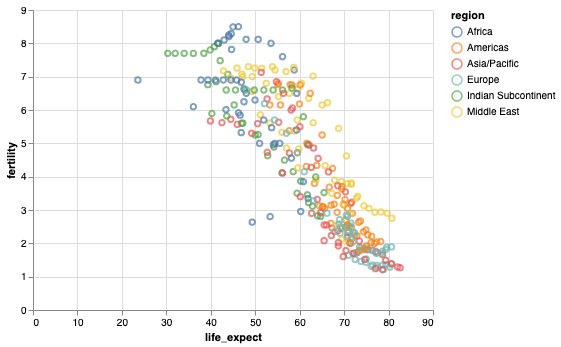

In [22]:
# base chart
chart = alt.Chart(
    df
).mark_point(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N'
)

chart.display()

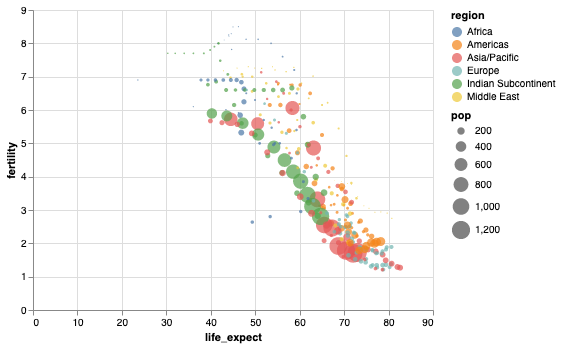

In [23]:
chart = alt.Chart(
    df
).mark_circle(  # circles instead of points
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size='pop'  # population maps to circle size
)

chart.display()

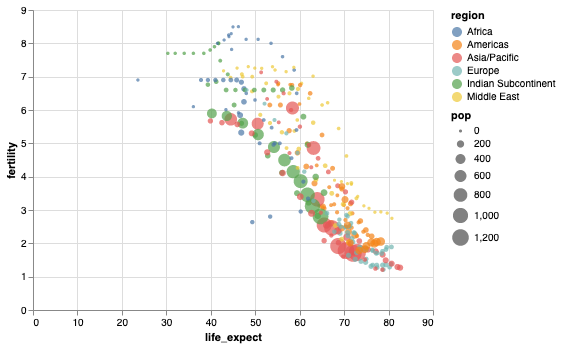

In [24]:
# this shows how to tweak properties of encodings

chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300]))   # change point scale to better show very small countries
)

chart.display()

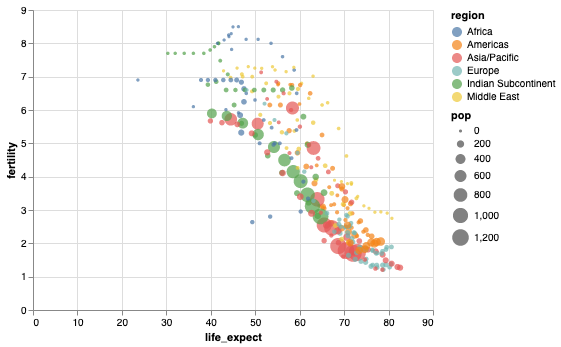

In [25]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300]))
).interactive()  # enable pan/zoom

chart.display()

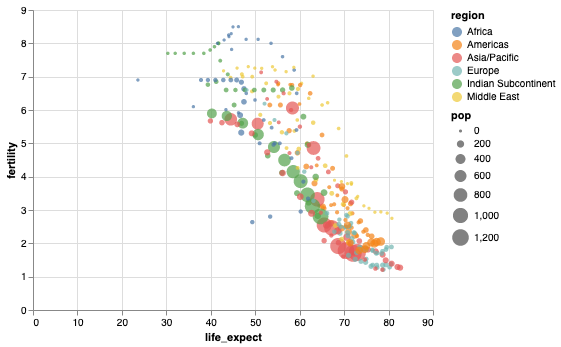

In [26]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']  # add a tooltip
).interactive()

chart.display()

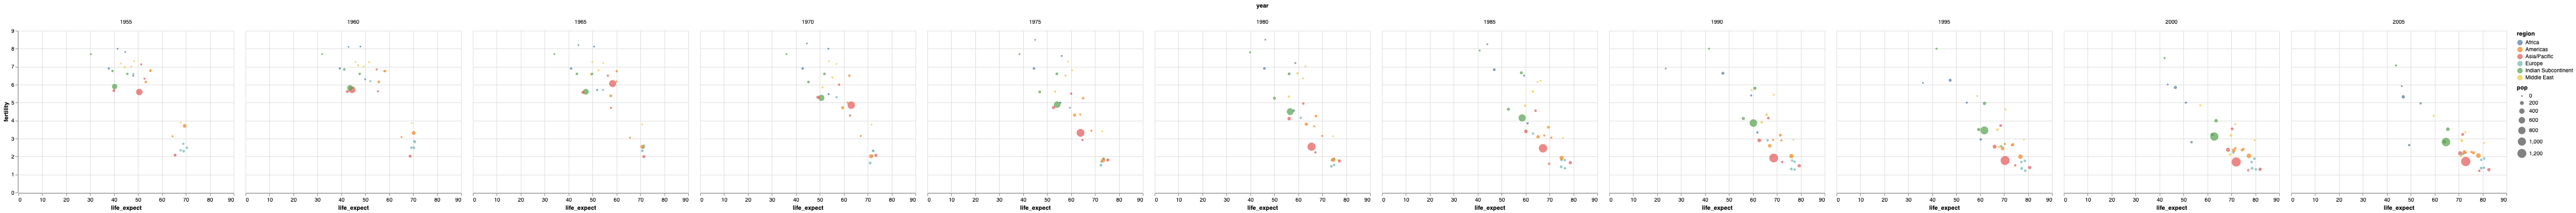

In [27]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year'],
    column='year',  # facet by year
)

chart.display()

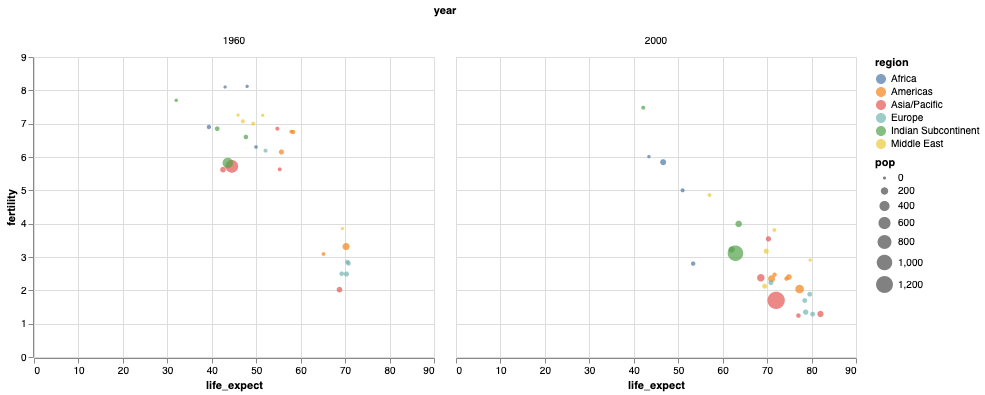

In [28]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year'],
    column='year'  # facet by year
).transform_filter(
    (alt.datum.year == 1960) | (alt.datum.year == 2000)  # filter for two years only
)

chart.display()

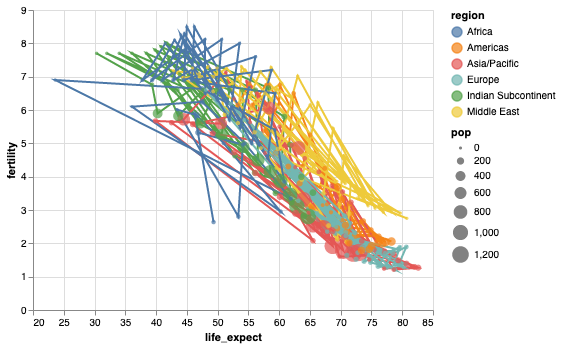

In [32]:
# go back to chart without faceting, try to show countries' trajectories as lines

circles = alt.Chart(  # assign circles layer to a variable
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
)

lines = alt.Chart(  # draw lines, same encoding as above
    df
).mark_line(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    order='year'  # order points in line by year (default would be x)
)

(lines + circles).display()  # layer the two charts

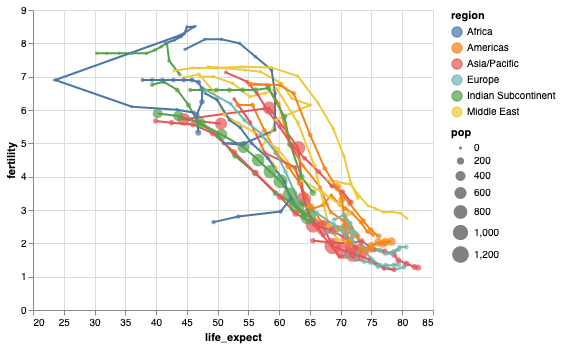

In [33]:
# In the above plot, a line is shown for each region, for all its countries.
# That's not what we want. The 'detail' channel enables grouping by a field, without a visual representation of the field.

circles = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
)

lines = alt.Chart(
    df
).mark_line(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    order='year',
    detail='country'  # detail on (split lines by) country
)

(lines + circles).display()

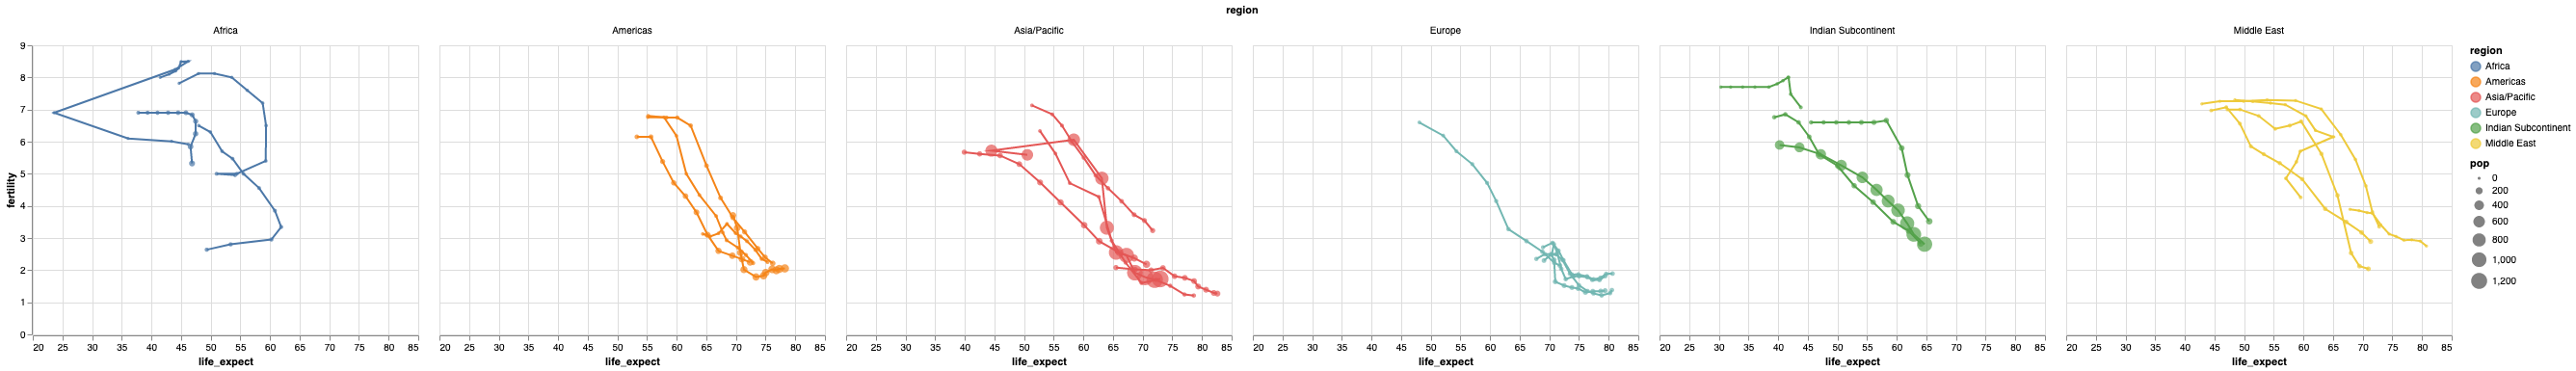

In [34]:
# faceting a layered chart is a bit tricky!

circles = alt.Chart().mark_circle(  # don't specify data per layer
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
)

lines = alt.Chart().mark_line(   # don't specify data per layer
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    detail='country:N',
    order='year'
)

alt.layer(lines, circles).facet('region:N', data=df).display()  # stick in data when faceting

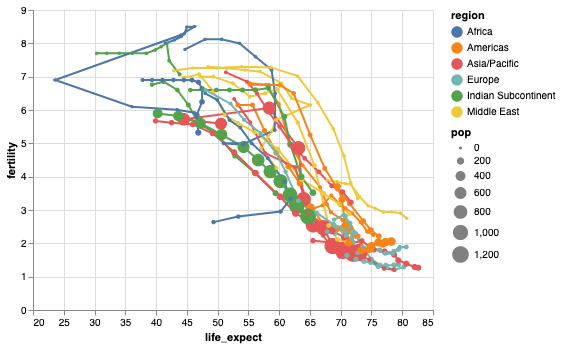

In [36]:
# go back to version without faceting, add interactive selection to show trajectories
# (code duplication could be greatly reduced by defining a base chart with common attributes)

sel = alt.selection(type='single', fields=['country'])  # define a single selection

circles = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color=alt.condition(sel, 'region:N', alt.value("grey")),  # condition the color on the selection
    opacity=alt.condition(sel, alt.value(1), alt.value(0.15)),  # condition the opacity on the selection
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
).add_selection(sel)

lines = alt.Chart(
    df
).mark_line(
).encode(
    x='life_expect',
    y='fertility',
    color=alt.condition(sel, 'region:N', alt.value("grey")),  # same line as above
    opacity=alt.condition(sel, alt.value(1), alt.value(0.2)),  # same line as above
    order='year',
    detail='country'
)

(lines + circles).display()

In [16]:
# save an html version of that chart
(lines + circles).save('output/interactive_live_demo.html')